In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from keras.layers.core import Dense
from tensorflow.keras.layers import InputLayer, Flatten
from tensorflow.keras import layers, Input
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import random

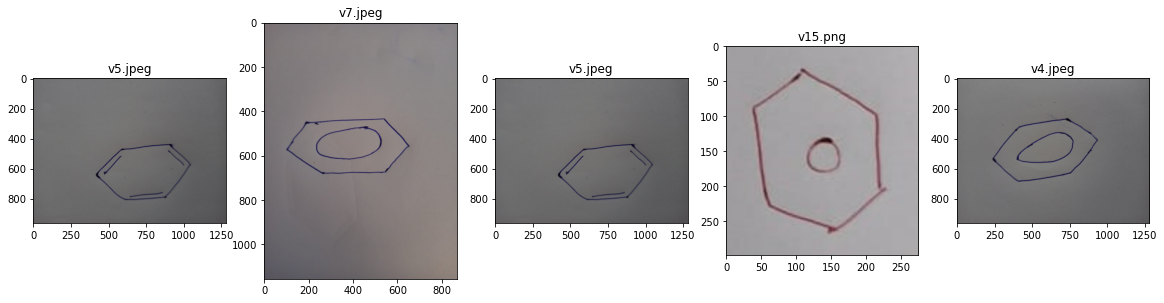

In [10]:
plt.figure(figsize=(20,20))
test_folder=r'../Datasets/benzene/'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [12]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder=r'../Datasets/'

def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r'../Datasets/')

target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'Adrenaline': 0,
 'Ethane': 1,
 'Ethene': 2,
 'Ethylene': 3,
 'Isopentane': 4,
 'M-xykene (1,3 - dimethylbenzene)': 5,
 'Neopentane': 6,
 'P-xylene (1,4 - dimethylbenzene)': 7,
 'Phenylalanine': 8,
 'Propylene': 9,
 'acetaminophen': 10,
 'acetylsalicylic': 11,
 'benzene': 12,
 'ibuprofen': 13,
 'o-xylene (1,2 - dimethylbenzene)': 14,
 'unknown': 15}

In [13]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [17]:
model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
            tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(6)
        ])
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.build([None, 224, 224, 3])

In [18]:
history = model.fit(x=np.array(img_data, np.float32), y=np.array(list(map(int,target_val)), np.float32), epochs=5)

Epoch 1/5


InvalidArgumentError:  Received a label value of 15 which is outside the valid range of [0, 6).  Label values: 9 8 12 12 10 12 12 0 2 4 6 12 12 3 12 12 12 12 5 15 12 14 12 15 15 1 12 7 12 12 12 12
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-18-6a26f5e98557>:1) ]] [Op:__inference_train_function_939]

Function call stack:
train_function
